In [23]:
# Import the pathlib and csv library
from pathlib import Path
import pandas as pd
import pygal
import csv
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

# Set the file paths

crypto_path = Path("Data/crypto_user_growth_aus.csv")
gym_est_path = Path("Data/gym_establishments.csv")
gym_user_path = Path("Data/gym_users.csv")
total_ops_path = Path("Data/total_operational_savings_edited.csv")
smart_path = Path("Data/smartphone_users.csv")
coin_path = Path("Data/coin_bitcoin.csv")
crypto_user_path = Path("Data/crypto_user_growth_aus.csv")
wallet_user_path = Path ("Data/my-wallet-n-users.csv")

In [2]:
# Reading in the crypto user growth
## Display Crypto user dataframe

crypto_df = pd.read_csv(crypto_path, index_col="year")
crypto_df 

,growth
year,
2019,16.8
2020,18.4
2021,28.8


In [3]:
# Reading in the gym establishments
## Display gym establishments dataframe

gym_est_df = pd.read_csv(gym_est_path, index_col="year")
gym_est_df.head()

,no_of_gyms
year,
2016,3900
2017,4400
2018,4800
2019,5000
2020,5300


In [4]:
# Reading in the gym user
## Display gym user dataframe

gym_user_df = pd.read_csv(gym_user_path, index_col = "age")
gym_user_df = gym_user_df.drop("No", axis=1)
gym_user_df.head()

,number_of_people
age,
15-17,263000
18-24,1103000
25-35,1720000
35-44,1367000
45-54,1151000


In [5]:
# Reading in the total operational savings
## Display total operational savings dataframe

total_ops_df = pd.read_csv(total_ops_path)
total_ops_df.head()

,no,Transaction_Amount,Price_Old,Total_Cost,Hedera,Total_Cost.1,Savings
0,1,100,0.88,88,0.00014,0.014,87.986
1,1,1000,0.88,888,0.00014,0.140,879.860
2,1,10000,0.88,8888,0.00014,1.140,8798.600
3,1,100000,0.88,88888,0.00014,11.400,87986.000
4,2,100,0.51,51,0.00014,0.014,50.986


In [6]:
# Data cleansing of total_ops_df
## Step 1 = renaming columns, 
### New cleansed dataframe called total_ops

total_ops = total_ops_df.set_axis(["Company","Transactional Occurence","Company Transaction Amnt",
                                  "Total Cost via Company","Hedera Transaction Amnt","Total Cost via Hedera","Savings Hedera vs Company"], axis=1, inplace=False)
total_ops.head()

,Company,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
0,1,100,0.88,88,0.00014,0.014,87.986
1,1,1000,0.88,888,0.00014,0.140,879.860
2,1,10000,0.88,8888,0.00014,1.140,8798.600
3,1,100000,0.88,88888,0.00014,11.400,87986.000
4,2,100,0.51,51,0.00014,0.014,50.986


In [7]:
# Checking datatypes within total_ops dataframe
total_ops.dtypes

Company                        int64
Transactional Occurence        int64
Company Transaction Amnt     float64
Total Cost via Company         int64
Hedera Transaction Amnt      float64
Total Cost via Hedera        float64
Savings Hedera vs Company    float64
dtype: object

In [8]:
# Data cleansing of total_ops
## Step 2 renaming indexes i.e. 1 = Payadvantage, 2 = PaySmart etc
### Then indexed Company column
#### New cleansed dataframe called total_ops_2

total_ops_2 = total_ops.replace({1:"PayAdvantage",2:"PaySmart",3:"EzyPay"})
total_ops_2 = total_ops_2.set_index("Company")
total_ops_2.head()

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
PayAdvantage,100,0.88,88,0.00014,0.014,87.986
PayAdvantage,1000,0.88,888,0.00014,0.140,879.860
PayAdvantage,10000,0.88,8888,0.00014,1.140,8798.600
PayAdvantage,100000,0.88,88888,0.00014,11.400,87986.000
PaySmart,100,0.51,51,0.00014,0.014,50.986


In [9]:
# Looking at total_ops_2 statistics

total_ops_2.describe()

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
count,12.000000,12.00000,12.000000,1.200000e+01,12.000000,12.000000
mean,27775.000000,0.61000,17024.750000,1.400000e-04,3.216833,16938.861500
std,43740.580804,0.20163,28739.570855,2.831031e-20,4.963346,28535.105764
min,100.000000,0.44000,44.000000,1.400000e-04,0.014000,43.986000
25%,775.000000,0.44000,352.000000,1.400000e-04,0.108500,351.891500
50%,5500.000000,0.51000,2644.000000,1.400000e-04,0.640000,2639.230000
75%,32500.000000,0.88000,17666.000000,1.400000e-04,3.900000,17595.450000
max,100000.000000,0.88000,88888.000000,1.400000e-04,11.400000,87986.000000


In [10]:
# Reading in the total smartphone users
## Display smartphone users dataframe

smart_df = pd.read_csv(smart_path, index_col="year")
smart_df = smart_df.drop("Unnamed: 2", axis=1)
smart_df.head()

,no_of_users
year,
2017,18600000
2018,19600000
2019,20000000
2020,20500000
2021,20600000


In [11]:
# Create_bar_chart function to plot (bar) dataframes

def create_bar_chart(data, title,xlabel,ylabel,color):

    create_bar_chart = data.hvplot.bar(title=title, xlabel=xlabel, ylabel=ylabel, color=color, height=500)
    
    return(create_bar_chart)

In [12]:
# Bar chart for crypto dataframe

crypto_bar_chart = create_bar_chart(crypto_df,"Cryptocurrency User Growth (in Years)", "Year", "In Millions ($)", "Orange")
crypto_bar_chart

:Bars   [year]   ( growth)

In [13]:
# Bar chart for gym establishments dataframe

gym_est_chart = create_bar_chart(gym_est_df,"Number of Gym Establishments (in Years)","Year","Number of gyms","Royalblue")
gym_est_chart

:Bars   [year]   (no_of_gyms)

In [14]:
# Bar chart for gym users dataframe

gym_user_chart = create_bar_chart(gym_user_df,"Number of Gym Users (2021)","Age Group","Number of people","Green").opts(yformatter="%.0f")
gym_user_chart

:Bars   [age]   (number_of_people)

In [15]:
# Bar chart smartphone users

smart_users_chart =  create_bar_chart(smart_df,"Number of people using smartphones","Years","Number of people","Pink").opts(yformatter="%.0f")
smart_users_chart

:Bars   [year]   (no_of_users)

In [16]:
# Creating transactional savings dataframe comparison for 100 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_100

total_ops_100 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 100]
total_ops_100 = total_ops_100[["Savings Hedera vs Company"]]
total_ops_100

,Savings Hedera vs Company
Company,
PayAdvantage,87.986
PaySmart,50.986
EzyPay,43.986


In [17]:
total_ops_2

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
PayAdvantage,100,0.88,88,0.00014,0.014,87.986
PayAdvantage,1000,0.88,888,0.00014,0.140,879.860
PayAdvantage,10000,0.88,8888,0.00014,1.140,8798.600
PayAdvantage,100000,0.88,88888,0.00014,11.400,87986.000
PaySmart,100,0.51,51,0.00014,0.014,50.986
PaySmart,1000,0.51,510,0.00014,0.140,509.860
PaySmart,10000,0.51,5100,0.00014,1.400,5098.600
PaySmart,100000,0.51,51000,0.00014,11.400,50986.000
EzyPay,100,0.44,44,0.00014,0.014,43.986


<AxesSubplot:title={'center':'Company Comparison'}, xlabel='Company'>

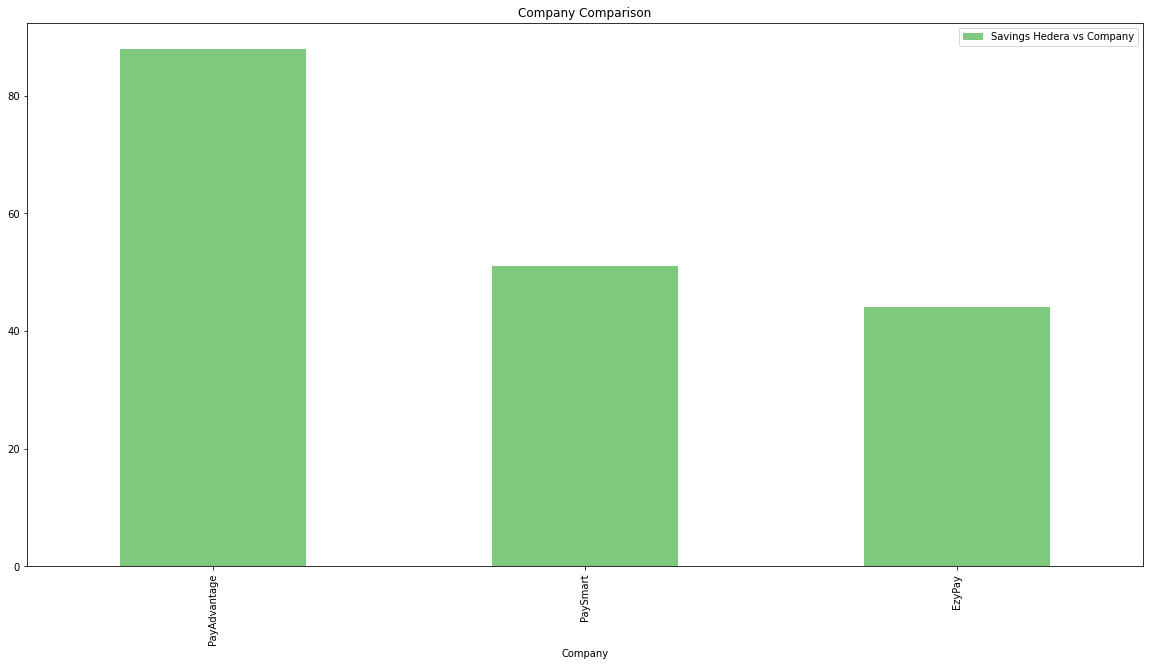

In [18]:
# Creating plot

total_ops_100.plot(kind="bar",title="Company Comparison",colormap="Accent",figsize=(20,10))

In [19]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_1000

total_ops_1000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 1000]
total_ops_1000 

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
PayAdvantage,1000,0.88,888,0.00014,0.14,879.86
PaySmart,1000,0.51,510,0.00014,0.14,509.86
EzyPay,1000,0.44,440,0.00014,0.14,439.86


In [20]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_10000

total_ops_10000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 10000]
total_ops_10000 

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
PayAdvantage,10000,0.88,8888,0.00014,1.14,8798.6
PaySmart,10000,0.51,5100,0.00014,1.40,5098.6
EzyPay,10000,0.44,4400,0.00014,1.40,4398.6


In [21]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_100000

total_ops_100000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 100000]
total_ops_100000 

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
PayAdvantage,100000,0.88,88888,0.00014,11.4,87986.0
PaySmart,100000,0.51,51000,0.00014,11.4,50986.0
EzyPay,100000,0.44,44000,0.00014,11.4,43986.0
